# Importing libraries and Loading the dataset

In [1]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import imghdr

C:\Users\Saket\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Remove Dodgy images

In [2]:
import os
import math

In [3]:
 data_dir = 'data'

In [4]:
img_exts = ['jpeg','jpg','bmp','png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


Issue with image data\sad\8iAb9k4aT.jpg
Issue with image data\sad\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
Issue with image data\sad\AdobeStock_221688877-copy.jpg
Issue with image data\sad\artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg
Issue with image data\sad\artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg
Issue with image data\sad\at-home-sad-sofa-300x200.jpg
Issue with image data\sad\b11b520b0818895ae5563d1e70294052.jpg
Issue with image data\sad\b2ap3_large_happy-sad-unsplash-850x575.jpg
Issue with image data\sad\boy-with-head-down.jpg
Issue with image data\sad\crying-at-work.jpg
Issue with image data\sad\Crying-girl.jpg
Issue with image data\sad\dark-depression-mood-people-wallpaper-preview.jpg
Issue with image data\sad\DD-blogpost-SAD-940x492.png
Issue with image data\sad\de2a0f4d137d0aeb839d43a2ea9b6c72.jpg
Issue with image data\sad\Depressed-woman-covering-her-eyes.jpg
Issue with image data\sad\Depression-More-Than-Being-Sad.jpg
Issue with image data\sad\dreamsti

### Load the Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
 data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [8]:
# Fetching another batch from the iterator
data_iterator = data.as_numpy_iterator()

In [9]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000283C8742CE0>)

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].shape

(32, 256, 256, 3)

In [12]:
# class 1 : Sad People
# class 0 : Happy People
batch[1]

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

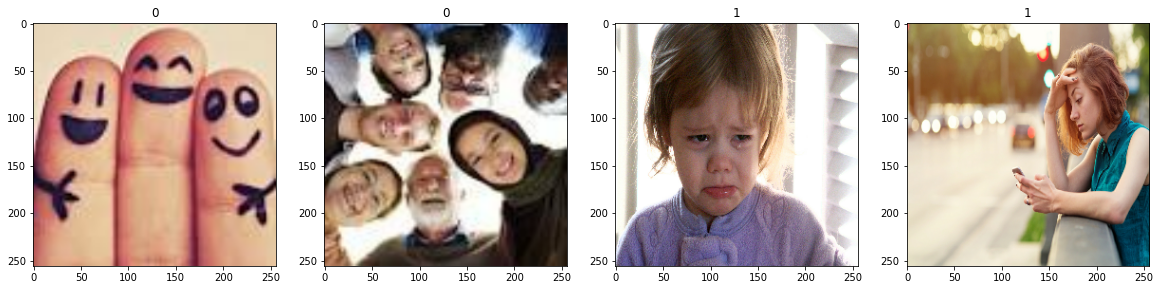

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

 # Data Pre-Processing

### Scaling the Data

In [14]:
data = data.map(lambda x,y: (x/255,y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].min()

0.0

In [18]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate (batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

### Splitting the Data

In [19]:
len(data)

10

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

### Building Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
# model.add(Conv2D('filter', 'size of the filter', 'stride' , activation='relu', input_shape = (256,256,3)))
# 'relu' : rectifier linear unit

In [25]:
# First layer needs an input
 
model.add(Conv2D(16, (3,3), 1 , activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

C:\Users\Saket\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 580ms/step - accuracy: 0.4470 - loss: 1.0819 - val_accuracy: 0.4375 - val_loss: 0.6993
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - accuracy: 0.5133 - loss: 0.6724 - val_accuracy: 0.5156 - val_loss: 0.6470
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5680 - loss: 0.6456 - val_accuracy: 0.7344 - val_loss: 0.6362
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.7605 - loss: 0.5978 - val_accuracy: 0.8281 - val_loss: 0.5013
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 607ms/step - accuracy: 0.8371 - loss: 0.5171 - val_accuracy: 0.7812 - val_loss: 0.4818
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.8150 - loss: 0.4418 - val_accuracy: 0.8750 - val_loss: 0.4367
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - accuracy: 0.8634 - loss: 0.3251 - val_accuracy: 0.7031 - val_loss: 0.4923
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.8198 - loss: 0.4007 - val_accuracy: 0.9219 - val_loss:

In [31]:
# hist.history


### Plot Performance

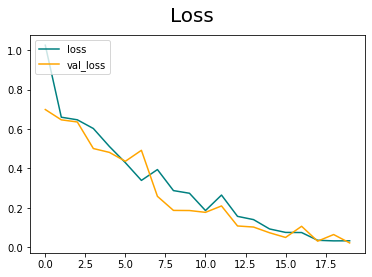

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label ='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

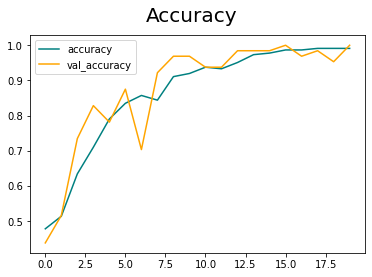

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label ='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

### Evaluation

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


In [37]:
print(f'''
Precision: { pre.result().numpy()} 
Recall: {re.result().numpy()} 
Accuracy: {acc.result().numpy()}
 ''')


Precision: 1.0 
Recall: 1.0 
Accuracy: 1.0
 


### Testing

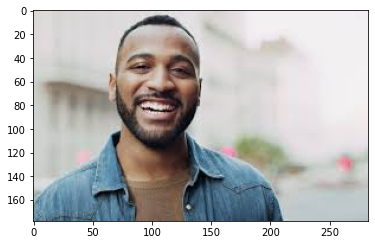

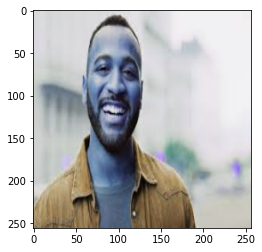

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The Person is happy


In [62]:
img = cv2.imread('happy_test1.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat1 = model.predict(np.expand_dims(resize/255,0))

 
if yhat1 > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')



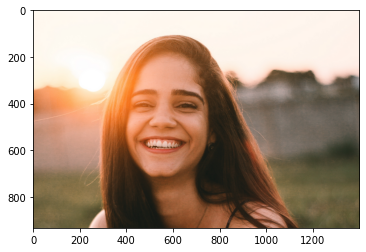

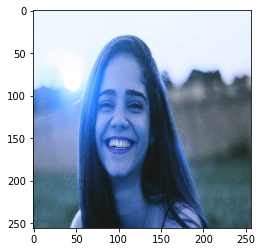

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The Person is sad


In [67]:
img = cv2.imread('happy_test2.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat1 = model.predict(np.expand_dims(resize/255,0))

 
if yhat1 > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')



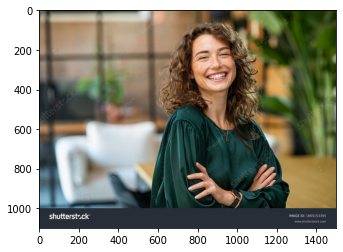

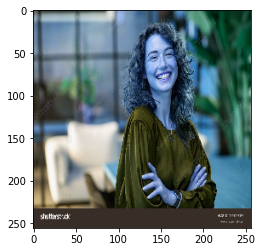

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.16513197]], dtype=float32)

In [59]:
img = cv2.imread('happy_test3.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat3 = model.predict(np.expand_dims(resize/255,0))
yhat3
# if yhat3 > 0.5:
#     print(f'The Person is sad')
# else:
#     print('The Person is happy')




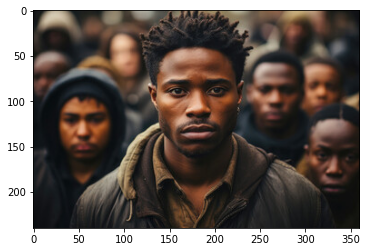

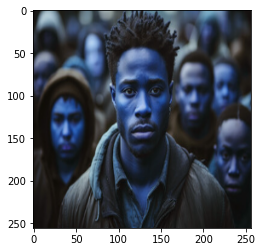

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Person is sad


In [41]:
img = cv2.imread('test_Images/sad_test1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255,0))
yhat
if yhat > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')




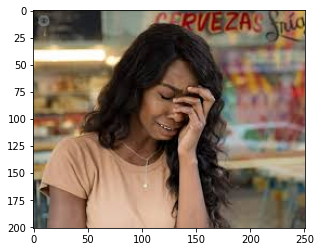

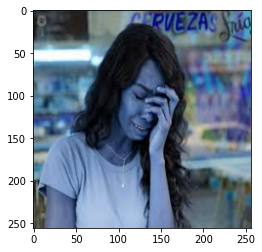

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Person is sad


In [42]:
img = cv2.imread('test_Images/sad_test2.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')



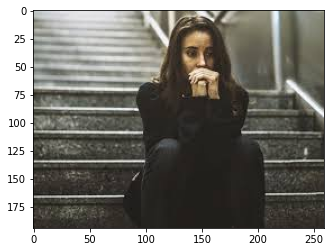

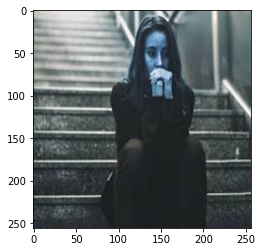

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Person is sad


In [43]:
img = cv2.imread('test_Images/sad_test3.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255,0))
 
if yhat > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')




# Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','happy_sad_model.h5'))

In [46]:
new_model = load_model(os.path.join('models','happy_sad_model.h5'))

In [47]:
new_model

<Sequential name=sequential, built=True>

In [48]:
yHatNew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [49]:
if yHatNew > 0.5:
    print(f'The Person is sad')
else:
    print('The Person is happy')

The Person is sad
